**DESCRIPTION**

**Problem Statement**

Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided.

The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.

You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

###Install library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 9.0 MB/s 


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Import library

In [ ]:
#Import the necessary library
import matplotlib.pyplot as plt
from itertools import cycle

import pandas as pd
import numpy as np
import re
# import required libraries
import os

In [ ]:
from sklearn import metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from scikeras.wrappers import KerasClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from scipy import stats as st

In [ ]:
import string
from string import punctuation
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTEN

In [ ]:
from livelossplot import PlotLossesKerasTF

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input, Model

###Import the data

In [ ]:
pd_df_test_data = pd.read_csv('/content/test_data.csv')
pd_df_test_data_hidden = pd.read_csv('/content/test_data_hidden.csv')
pd_df_train_data = pd.read_csv('/content/train_data.csv')

In [ ]:
pd_df_test_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [ ]:
pd_df_test_data_hidden.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [ ]:
pd_df_train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


###Functions

In [ ]:
def print_stats(labels, predictions):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  (tp, fp), (fn, tn)  = confusion_matrix(labels, predictions)
  print("Confusion matrix: tp {}, fp {}, fn {}, tn {}".format(tp, fp, fn, tn))



In [ ]:
def pd_df_multi_class_confusion_matrix(pd_s_target, pd_s_predict):
  class_sample_ = pd_s_target.unique()
  cm = confusion_matrix(pd_s_target, pd_s_predict, labels=class_sample_)
  multi_columns = zip(['Predicted label']*(len(class_sample_)), class_sample_)
  multi_index = zip(['Actual label']*(len(class_sample_)), class_sample_)
  multi_columns = pd.MultiIndex.from_tuples(list(multi_columns))
  multi_index = pd.MultiIndex.from_tuples(list(multi_index))
  return pd.DataFrame(cm, columns=multi_columns, index=multi_index)

In [ ]:
# Compute ROC curve and ROC area for each class
def roc_curve_multiclass(pd_s_target, pd_s_predict):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  class_samples_ = pd_s_target.unique()
  # Binarize the output
  np_target = label_binarize(pd_s_target, classes=class_samples_)
  np_predict = label_binarize(pd_s_predict, classes=class_samples_)

  for sample, unique in zip(class_samples_, range(len(class_samples_))):
    fpr[sample], tpr[sample], _ = roc_curve(np_target[:, unique], np_predict[:, unique])
    roc_auc[sample] = auc(fpr[sample], tpr[sample])
  return fpr, tpr, roc_auc

In [ ]:
def plot_auc_roc_multiclass(fpr, tpr, roc_auc, class_samples_):
  plt.figure()
  lw = len(class_samples_)
  for i in class_samples_:
      plt.plot(
          fpr[i],
          tpr[i],
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic example")
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
class MyTextProcess():
  def __init__(self):
    re_exp_punctuation = '[{}]'.format('\\'.join([char_ for char_ in punctuation]))
    self.reObjPunct = re.compile(re_exp_punctuation)
    self.reObjWhiteSpace = re.compile(r'\s{2, 10}')

    self.wnl = WordNetLemmatizer()

  def txt_vectorization(self, sequence):
    sequence = sequence.lower()
    sequence = self.reObjPunct.sub(' ', sequence)
    sequence = self.reObjWhiteSpace.sub(' ', sequence)
    wordslist = nltk.word_tokenize(sequence)
    wordslist = [self.wnl.lemmatize(word) for word in wordslist if word not in stopwords.words('english')]
    return wordslist


##**Project Task: Week 1**

**Class Imbalance Problem:**

1.   Perform an EDA on the dataset.
   *   See what a positive, negative, and neutral review looks like
   *   Check the class count for each class. It’s a class imbalance problem.

2.   Convert the reviews in Tf-Idf score.

3.   Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

**Tackling Class Imbalance Problem:**

4.   Oversampling or undersampling can be used to tackle the class imbalance problem.

5.   In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

6.   Use Tree-based classifiers like Random Forest and XGBoost.

**Note:** Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.


###Perform an EDA on the dataset

####Data preprocesing

#####Managing null values

In [ ]:
#check test data to null values
pd_df_test_data.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
dtype: int64

In [ ]:
#drop null value of test data
pd_df_test_data = pd_df_test_data.dropna()

In [ ]:
#check test data hidden to null values
pd_df_test_data_hidden.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

In [ ]:
#drop null value of test hidden data
pd_df_test_data_hidden = pd_df_test_data_hidden.dropna()

In [ ]:
#check train data to null values
pd_df_train_data.isnull().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [ ]:
#drop null value of train data
pd_df_train_data = pd_df_train_data.dropna()

#####Duplicated

In [ ]:
#check test data if is duplicated
pd_s_index_dubl = pd_df_test_data.duplicated()

In [ ]:
#show duplicated record, test data
pd_df_test_data[pd_s_index_dubl]

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
389,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-06-23T00:00:00.000Z,This tablet does a great deal! From surfing th...,Does a lot
420,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-10-18T00:00:00.000Z,I wanted to get something nice for my wife and...,Wife loved it
886,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablets",Electronics,2016-12-14T00:00:00.000Z,I bought one for my boyfriend and one for his ...,Great tablet for normal use


In [ ]:
#check test data hidden if is duplicated
pd_s_index_dubl = pd_df_test_data_hidden.duplicated()

In [ ]:
#show duplicated record, test data hidden
pd_df_test_data_hidden[pd_s_index_dubl]

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
389,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-06-23T00:00:00.000Z,This tablet does a great deal! From surfing th...,Does a lot,Positive
420,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-10-18T00:00:00.000Z,I wanted to get something nice for my wife and...,Wife loved it,Positive
886,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablets",Electronics,2016-12-14T00:00:00.000Z,I bought one for my boyfriend and one for his ...,Great tablet for normal use,Positive


In [ ]:
#check train data if is duplicated
pd_s_index_dubl = pd_df_train_data.duplicated()

In [ ]:
#print sum of duplicated record, train data
pd_s_index_dubl.sum()

58

In [ ]:
#show first 5 duplicated record, train data
pd_df_train_data[pd_s_index_dubl].head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
709,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
866,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2017-09-01T00:00:00.000Z,"This is really good if you read a lot, doesn't...",Great buy if you read a lot,Positive
1085,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-02-15T00:00:00.000Z,Great for kids. Simple and inexpensive. 16G mu...,Simple tablet,Positive
1116,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2016-12-24T00:00:00.000Z,Item work well and was easy to read from in da...,Work,Positive
1131,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,"Good tablet for my daughter! She loves it ,but...",Great!,Positive


####Encoding Techniques

In [ ]:
from sklearn import preprocessing

In [ ]:
#le_sentiment = preprocessing.LabelEncoder()
#le_sentiment.fit(pd_df_train_data['sentiment'])

#pd_df_train_data['sentiment'] = le_sentiment.transform(pd_df_train_data['sentiment'])

####See what a positive, negative, and neutral review looks like

In [ ]:
#Check the class count of test data hidden for each target data
pd_df_test_data_hidden['sentiment'].value_counts()

Positive    934
Neutral      39
Negative     24
Name: sentiment, dtype: int64

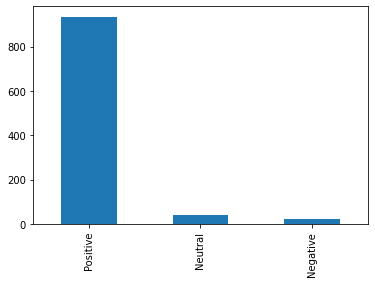

In [ ]:
#Check the class count of test data hidden for each target data
pd_df_test_data_hidden['sentiment'].value_counts().plot.bar()

In [ ]:
#Check the class count of train data for each target data. It’s a class imbalance problem
pd_df_train_data['sentiment'].value_counts()

Positive    3739
Neutral      158
Negative      93
Name: sentiment, dtype: int64

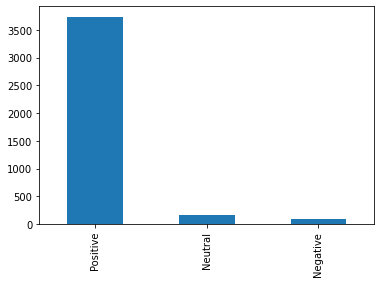

In [ ]:
#Check the class count of train data for each target data
pd_df_train_data['sentiment'].value_counts().plot.bar()

####Data organisation

In [ ]:
#feature selection for train data
pd_s_feature_train = pd_df_train_data['reviews.title'] + ' ' + pd_df_train_data['reviews.text']
pd_s_target_train = pd_df_train_data['sentiment']

#feature selection for test data
pd_s_feature_test = pd_df_test_data['reviews.title'] + ' ' + pd_df_test_data['reviews.text']

#feature selection for test data hidden
pd_s_feature_test_hidden = pd_df_test_data_hidden['reviews.title'] + ' ' + pd_df_test_data_hidden['reviews.text']
pd_s_target_test_hidden = pd_df_test_data_hidden['sentiment']

In [ ]:
#copy train feature, all feature for bag of words
pd_s_feature = pd_s_feature_train.copy()
#add test feature
pd_s_feature = pd_s_feature.append(pd_s_feature_test, ignore_index=True)
#add test hidden feature
pd_s_feature = pd_s_feature.append(pd_s_feature_test_hidden, ignore_index=True)

In [ ]:
#print total number of record
pd_s_feature_train.shape[0] + pd_s_feature_test.shape[0] + pd_s_feature_test_hidden.shape[0]

5984

In [ ]:
#print total number of record of final data frame
pd_s_feature.shape

(5984,)

###Convert the reviews in Tf-Idf score

In [ ]:
#text process object
my_txt_process = MyTextProcess()
# bag of words by applying the function and fit the data (comment) into it
obj_bag_of_words = CountVectorizer(analyzer=my_txt_process.txt_vectorization).fit(pd_s_feature)
# apply transform method for the bag of words for all feature
all_bag_of_words = obj_bag_of_words.transform(pd_s_feature)
# apply tfidf fit method for all bag of words
obj_tfidf = TfidfTransformer().fit(all_bag_of_words)

In [ ]:
# apply transform method for the bag of words of train data
train_bag_of_words = obj_bag_of_words.transform(pd_s_feature_train)
# apply tfidf transformer for train bag of words into it (transformed version)
train_tfidf = obj_tfidf.transform(train_bag_of_words)

# apply transform method for the bag of words of test data hidden
test_hidden_bag_of_words = obj_bag_of_words.transform(pd_s_feature_test_hidden)
# apply tfidf transformer for train bag of words into it (transformed version)
test_hidden_tfidf = obj_tfidf.transform(test_hidden_bag_of_words)

###Run multinomial Naive Bayes classifier

In [ ]:
#choose naive Bayes model to detect the sentiment and fit the tfidf data into it
sentiment_NB_detection_model = MultinomialNB().fit(train_tfidf, pd_s_target_train)

In [ ]:
#check model for prediction
predict_sentiment = sentiment_NB_detection_model.predict(test_hidden_tfidf)

In [ ]:
#delete object
del sentiment_NB_detection_model

####Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_sentiment))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.31      0.33      0.32       997
weighted avg       0.88      0.94      0.91       997



In [ ]:
#Perform confusion matrix on pandas data frame
pd_df_conf_matrix = pd_df_multi_class_confusion_matrix(pd_s_target_test_hidden, predict_sentiment)

In [ ]:
#Show confusion matrix for test data hidden
pd_df_conf_matrix.head()

Predicted label                 
                             Positive Negative Neutral
Actual label Positive             934        0       0
             Negative              24        0       0
             Neutral               39        0       0

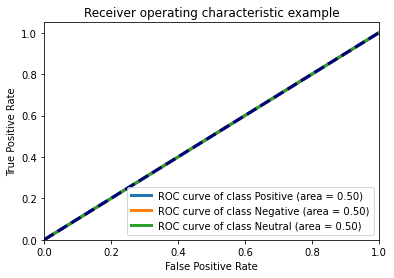

In [ ]:
fpr, tpr, roc_auc = roc_curve_multiclass(pd_s_target_test_hidden, predict_sentiment)
plot_auc_roc_multiclass(fpr, tpr, roc_auc, pd_s_target_test_hidden.unique())

###SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
#Oversampling is used to tackle the class imbalance problem.
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(train_tfidf, pd_s_target_train)
del smote

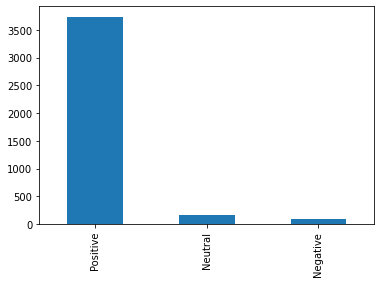

In [ ]:
#Check the class count of test data hidden for each target data
pd_s_target_train.value_counts().plot.bar()

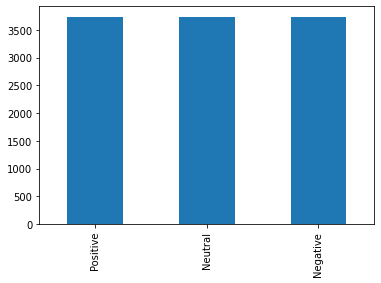

In [ ]:
y_sm.value_counts().plot.bar()

###Classifiers

####Naive Bayes classifier

In [ ]:
#choose naive Bayes model to detect the sentiment and fit the tfidf data into it
sentiment_NB_detection_model = MultinomialNB().fit(X_sm, y_sm)

In [ ]:
#check model for prediction
predict_NB = sentiment_NB_detection_model.predict(test_hidden_tfidf)

In [ ]:
del sentiment_NB_detection_model

#####Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_NB))

              precision    recall  f1-score   support

    Negative       0.50      0.54      0.52        24
     Neutral       0.26      0.51      0.34        39
    Positive       0.98      0.93      0.96       934

    accuracy                           0.91       997
   macro avg       0.58      0.66      0.61       997
weighted avg       0.94      0.91      0.92       997



In [ ]:
#Perform confusion matrix on pandas data frame
pd_df_conf_matrix = pd_df_multi_class_confusion_matrix(pd_s_target_test_hidden, predict_NB)
#Show confusion matrix for test data hidden
pd_df_conf_matrix.head()

Predicted label                 
                             Positive Negative Neutral
Actual label Positive             873        9      52
             Negative               6       13       5
             Neutral               15        4      20

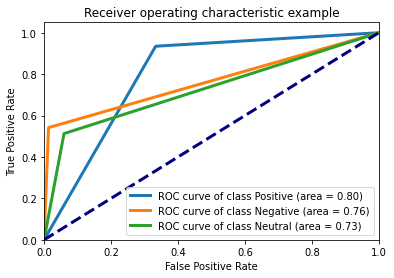

In [ ]:
fpr, tpr, roc_auc = roc_curve_multiclass(pd_s_target_test_hidden, predict_NB)
plot_auc_roc_multiclass(fpr, tpr, roc_auc, pd_s_target_test_hidden.unique())

####Random Forests Classifier

In [ ]:
#create random forest classifier object
sentiment_RF_detection_model = RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
#choose random forest model to detect the sentiment and fit the tfidf data into it
sentiment_RF_detection_model.fit(X_sm, y_sm)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [ ]:
#check model for prediction
predict_RF = sentiment_RF_detection_model.predict(test_hidden_tfidf)

In [ ]:
#delete object
del sentiment_RF_detection_model

#####Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_RF))

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       0.85      0.28      0.42        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.93      0.52      0.62       997
weighted avg       0.95      0.95      0.94       997



In [ ]:
#Perform confusion matrix on pandas data frame
pd_df_conf_matrix = pd_df_multi_class_confusion_matrix(pd_s_target_test_hidden, predict_RF)
#Show confusion matrix for test data hidden
pd_df_conf_matrix.head()

Predicted label                 
                             Positive Negative Neutral
Actual label Positive             932        0       2
             Negative              17        7       0
             Neutral               28        0      11

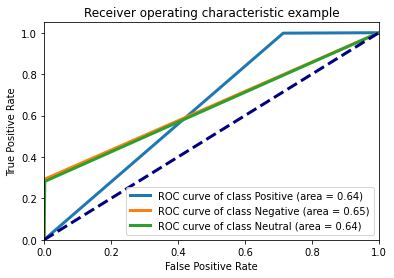

In [ ]:
fpr, tpr, roc_auc = roc_curve_multiclass(pd_s_target_test_hidden, predict_RF)
plot_auc_roc_multiclass(fpr, tpr, roc_auc, pd_s_target_test_hidden.unique())

#####Fine-tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_jobs=-1,random_state=51)
# Random search of parameters, using 3 fold cross validation,
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_sm, y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=51),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [ ]:
#show best pamameters
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [ ]:
#predict sentiment with best random paramenters
predict_RF_best_rand_params = rf_random.best_estimator_.predict(test_hidden_tfidf)
#delete
del rf_random

Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_RF_best_rand_params))

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.28      0.44        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.62       997
weighted avg       0.96      0.95      0.94       997



####XGBoost Classifier

In [ ]:
#create eXtreme Gradient Boosting classifier object
sentiment_XGB_detection_model = XGBClassifier(n_jobs=-1,random_state=51)

In [ ]:
#choose eXtreme Gradient Boosting model to detect the sentiment and fit the tfidf data into it
sentiment_XGB_detection_model.fit(X_sm, y_sm)

XGBClassifier(n_jobs=-1, objective='multi:softprob', random_state=51)

In [ ]:
#check model for prediction
predict_XGB = sentiment_XGB_detection_model.predict(test_hidden_tfidf)
#delete object
del sentiment_XGB_detection_model

#####Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_XGB))

              precision    recall  f1-score   support

    Negative       0.24      0.25      0.24        24
     Neutral       0.15      0.15      0.15        39
    Positive       0.95      0.95      0.95       934

    accuracy                           0.90       997
   macro avg       0.45      0.45      0.45       997
weighted avg       0.90      0.90      0.90       997



In [ ]:
#Perform confusion matrix on pandas data frame
pd_df_conf_matrix = pd_df_multi_class_confusion_matrix(pd_s_target_test_hidden, predict_XGB)
#Show confusion matrix for test data hidden
pd_df_conf_matrix.head()

Predicted label                 
                             Positive Negative Neutral
Actual label Positive             887       16      31
             Negative              16        6       2
             Neutral               30        3       6

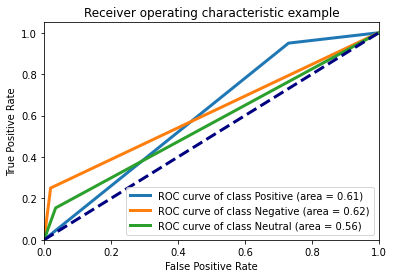

In [ ]:
fpr, tpr, roc_auc = roc_curve_multiclass(pd_s_target_test_hidden, predict_XGB)
plot_auc_roc_multiclass(fpr, tpr, roc_auc, pd_s_target_test_hidden.unique())

#####Fine-tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Step size at each iteration
eta = [.1, .2, .5, .7, 1]
# Fraction of observations that need to be sampled for each tree
subsample = [.1, .2, .5, .7, 1]
# Create the random grid
random_xgb_grid = {# Parameters that we are going to tune.
                'max_depth':max_depth,
                'n_estimators': n_estimators,
                'eta':eta,
                'subsample': subsample,
              }

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBClassifier(n_jobs=-1, random_state=51)
# Random search of parameters, using 3 fold cross validation,
# search across 10 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb,
                                param_distributions = random_xgb_grid,
                                n_iter = 10, cv = 3,
                                verbose=2, random_state=42,
                                n_jobs = -1)
# Fit the random search model
xgb_random.fit(X_sm, y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(n_jobs=-1, random_state=51),
                   n_jobs=-1,
                   param_distributions={'eta': [0.1, 0.2, 0.5, 0.7, 1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'n_estimators': [90, 302, 514, 726, 938,
                                                         1151, 1363, 1575, 1787,
                                                         2000],
                                        'subsample': [0.1, 0.2, 0.5, 0.7, 1]},
                   random_state=42, verbose=2)

In [ ]:
#show best pamameters
xgb_random.best_params_

{'subsample': 1, 'n_estimators': 1787, 'max_depth': 20, 'eta': 0.5}

In [ ]:
#predict sentiment with best random paramenters
predict_XGB_best_rand_params = xgb_random.best_estimator_.predict(test_hidden_tfidf)

#delete object
del xgb_random

Evaluation metrics

In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_XGB_best_rand_params))

              precision    recall  f1-score   support

    Negative       0.50      0.42      0.45        24
     Neutral       0.50      0.38      0.43        39
    Positive       0.96      0.98      0.97       934

    accuracy                           0.94       997
   macro avg       0.65      0.59      0.62       997
weighted avg       0.93      0.94      0.94       997



###Evaluation of Naive Bayes vs Random Forest vs Xgboost

In [ ]:
#Evaluation Metrics of Naive Bayes Classificator
print(metrics.classification_report(pd_s_target_test_hidden, predict_NB))

              precision    recall  f1-score   support

    Negative       0.50      0.54      0.52        24
     Neutral       0.26      0.51      0.34        39
    Positive       0.98      0.93      0.96       934

    accuracy                           0.91       997
   macro avg       0.58      0.66      0.61       997
weighted avg       0.94      0.91      0.92       997



In [ ]:
#Evaluation Metrics of Random Forest Classificator
print(metrics.classification_report(pd_s_target_test_hidden, predict_RF_best_rand_params))

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.28      0.44        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.62       997
weighted avg       0.96      0.95      0.94       997



In [ ]:
#Evaluation Metrics eXtreme Gradient Boosting
print(metrics.classification_report(pd_s_target_test_hidden, predict_XGB_best_rand_params))

              precision    recall  f1-score   support

    Negative       0.50      0.42      0.45        24
     Neutral       0.50      0.38      0.43        39
    Positive       0.96      0.98      0.97       934

    accuracy                           0.94       997
   macro avg       0.65      0.59      0.62       997
weighted avg       0.93      0.94      0.94       997



In [ ]:
dict_pred = {'NB': predict_NB,
             'RF': predict_RF_best_rand_params,
             'XGB': predict_XGB_best_rand_params,
             }

In [ ]:
#
pd_s_pred_mode = pd.DataFrame(dict_pred).T.mode().T[0]

In [ ]:
#Evaluation Metrics mode of Naive Bayes, Random Forest and Xgboost
print(metrics.classification_report(pd_s_target_test_hidden, pd_s_pred_mode))

              precision    recall  f1-score   support

    Negative       0.80      0.50      0.62        24
     Neutral       0.76      0.33      0.46        39
    Positive       0.96      1.00      0.98       934

    accuracy                           0.96       997
   macro avg       0.84      0.61      0.69       997
weighted avg       0.95      0.96      0.95       997



##**Project Task: Week 2**

**Model Selection:**

1.   Apply multi-class SVM’s and neural nets.

2.   Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

3.   Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

**Applying LSTM:**

4.   Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)

**Hint:** Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

5.   Compare the accuracy of neural nets with traditional ML based algorithms.

6.   Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral.

**Hint:** Use techniques like Grid Search, Cross-Validation and Random Search

**Topic Modeling:**

7.   Cluster similar reviews.

**Note:** Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.

8.   Perform Topic Modeling

**Hint:** Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).


###Apply multi-class SVM’s

####Multi-class SVM’s

Source link: https://www.baeldung.com/cs/svm-multiclass-classification

We’ll create two objects from SVM, to create two different classifiers; one with Polynomial kernel, and another one with RBF kernel:

In [ ]:
#SVM object, with RBF kernel
sentiment_SVC_rbf_detection_model = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_sm, y_sm)

In [ ]:
#SVM object, with Polynomial kernel
sentiment_SVC_poly_detection_model = svm.SVC(kernel='poly', degree=3, C=1).fit(X_sm, y_sm)

In [ ]:
#check SVM with RBF kernel model for prediction
predict_SVC_rbf = sentiment_SVC_rbf_detection_model.predict(test_hidden_tfidf)

#delete object
del sentiment_SVC_rbf_detection_model

In [ ]:
#check SVM with Polynomial kernel model for prediction
predict_SVC_poly = sentiment_SVC_poly_detection_model.predict(test_hidden_tfidf)

#delete object
del sentiment_SVC_poly_detection_model

#####Evaluation metrics

In [ ]:
#Evaluation Metrics for SVM with RBF kernel model
print(metrics.classification_report(pd_s_target_test_hidden, predict_SVC_rbf))

              precision    recall  f1-score   support

    Negative       0.89      0.33      0.48        24
     Neutral       1.00      0.28      0.44        39
    Positive       0.96      1.00      0.98       934

    accuracy                           0.96       997
   macro avg       0.95      0.54      0.63       997
weighted avg       0.96      0.96      0.94       997



In [ ]:
#Evaluation Metrics for SVM with Polynomial kernel model
print(metrics.classification_report(pd_s_target_test_hidden, predict_SVC_poly))

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.28      0.44        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.62       997
weighted avg       0.96      0.95      0.94       997



###Multi-class neural nets

Source link: https://www.tensorflow.org/text/tutorials/text_classification_rnn#create_the_text_encoder

####**Create the text encoder**

The raw text loaded from *pd_s_feature* needs to be processed before it can be used in a model. The simplest way to process text for training is using the TextVectorization layer.

#####Calculate paramenter for encoder layer

In [ ]:
#get vocabulary from bag of words object
lst_bag_of_words_vacabulary = list(obj_bag_of_words.vocabulary_.keys())
np_bag_of_words_vacabulary = np.array(lst_bag_of_words_vacabulary)

In [ ]:
#show first 10 words
np_bag_of_words_vacabulary[:10]

array(['powerful', 'tablet', 'purchased', 'black', 'fridaypros', 'great',
       'price', 'even', 'sale', 'fast'], dtype='<U51')

In [ ]:
#find max number of words per review
max_nbr_wors_per_review = 0
#find index of max number of words per review
idx_max_nbr_wors_per_review = 0
i = 0
for nbr_row_words in all_bag_of_words:
  tmp_nbr_words_per_review = nbr_row_words.sum()
  if (max_nbr_wors_per_review < tmp_nbr_words_per_review):
    max_nbr_wors_per_review = tmp_nbr_words_per_review
    idx_max_nbr_wors_per_review = i
  i+=1

In [ ]:
#Show max number of words per review
max_nbr_wors_per_review

718

In [ ]:
#Show sentiment of index of max number of words per review
pd_s_target_train[idx_max_nbr_wors_per_review]

'Positive'

In [ ]:
#Show review of index of max number of words per review
pd_s_feature[idx_max_nbr_wors_per_review]

'Great price on an awesome little tablet I\'ve had lots of tablets in the past, mostly from the Samsung line, but this is my first Amazon Fire, so I want to write this review for others who have never tried one of these. At the time that this was written, Alexa had not been added to the tablet.First, while this device runs an Android type of operating system, Amazon puts its own spin on the operating system. I don\'t feel like I\'m using Android. This feels different to me. It doesn\'t have the same level of customization that Android users have come to appreciate. That being said, if you are an Amazon Prime member, this device has been tailored to be your content entertainment machine. It\'s simply a fun way to consume your magazines, books, etc.There are 3 on-screen buttons on the bottom of the device. The middle button immediately takes you to your home screen. The button to the left acts as a sort of "back" button. It also lets me get rid of my keyboard when I don\'t need it on scr

#####Create text vectorization layer

In [ ]:
#Create text vectorization layer

#Note: that this vocabulary contains 1 OOV token,
#so the effective number of tokens is (max_tokens - 1 - (1 if output_mode == "int" else 0))
VOCAB_SIZE = np_bag_of_words_vacabulary.shape[0] + 2
# max number of words per review is 749, but we put 2000 for rezerv and stop words
OUTPUT_SESUENCE_LENGTH = 2000
encoder_layer_review = layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    standardize='strip_punctuation',
    output_sequence_length=OUTPUT_SESUENCE_LENGTH,
    pad_to_max_tokens=False,
    vocabulary=np_bag_of_words_vacabulary,# is vocabulary used for machine learning models
)

In [ ]:
#show first 10 words from layer vacabulary
np.array(encoder_layer_review.get_vocabulary())[:10]

array(['', '[UNK]', 'powerful', 'tablet', 'purchased', 'black',
       'fridaypros', 'great', 'price', 'even'], dtype='<U51')

In [ ]:
#Show encoded review with the biggest number of words
enc_review_big_nbr_words = encoder_layer_review(pd_s_feature[idx_max_nbr_wors_per_review]).numpy()
enc_review_big_nbr_words

array([1, 8, 1, ..., 0, 0, 0])

In [ ]:
#Show decoded review with the biggest number of words
print(" ".join(np.array(encoder_layer_review.get_vocabulary())[enc_review_big_nbr_words]))

[UNK] price [UNK] [UNK] awesome little tablet [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] past mostly [UNK] [UNK] [UNK] line [UNK] [UNK] [UNK] [UNK] first [UNK] [UNK] [UNK] [UNK] want [UNK] write [UNK] review [UNK] others [UNK] [UNK] never tried one [UNK] [UNK] [UNK] [UNK] time [UNK] [UNK] [UNK] written [UNK] [UNK] [UNK] [UNK] added [UNK] [UNK] [UNK] [UNK] [UNK] device [UNK] [UNK] [UNK] type [UNK] operating system [UNK] [UNK] [UNK] [UNK] spin [UNK] [UNK] operating system [UNK] dont feel like [UNK] using [UNK] [UNK] [UNK] different [UNK] [UNK] [UNK] doesnt [UNK] [UNK] [UNK] level [UNK] customization [UNK] [UNK] [UNK] [UNK] come [UNK] appreciate [UNK] [UNK] said [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] member [UNK] device [UNK] [UNK] tailored [UNK] [UNK] [UNK] content entertainment machine [UNK] simply [UNK] fun way [UNK] consume [UNK] [UNK] [UNK] [UNK] [UNK] 3 onscreen [UNK] [UNK] [UNK] bottom [UNK] [UNK] device [UNK] middle button immediately [UNK] [UNK] [UNK] [UNK] home screen [UNK] button [

####Create the neural network model


In [ ]:
input_embeding_layer_nn = Input(shape=(2000,), dtype=np.uint32)
x = layers.Embedding(
                    input_dim=VOCAB_SIZE,
                    output_dim=64,
                    mask_zero=True,
                    # Use masking to handle the variable sequence lengths
                    input_length=OUTPUT_SESUENCE_LENGTH,
                )(input_embeding_layer_nn)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2,
   strides=2, padding='valid')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2,
   strides=2, padding='valid')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(1, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.4)(x)
out_layer_nn = layers.Dense(len(pd_s_target_train.unique()), activation='sigmoid')(x)

In [ ]:
#create neural network model
embeding_model_nn = Model(input_embeding_layer_nn, out_layer_nn)

#### Compile the model

We will, use the `tf.keras.optimizers.Adam` optimizer and `categorical_crossentropy` loss function.

In [ ]:
embeding_model_nn.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

#### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [ ]:
embeding_model_nn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 embedding (Embedding)       (None, 2000, 64)          316672    
                                                                 
 dense (Dense)               (None, 2000, 512)         33280     
                                                                 
 batch_normalization (BatchN  (None, 2000, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1000, 512)        0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 1000, 256)         131328

#### Train and visualize the model results

In [ ]:
#encode train data
encode_feature_train = encoder_layer_review(pd_s_feature_train)
#encode test data hidden
encode_feature_test_hidden = encoder_layer_review(pd_s_target_test_hidden)

In [ ]:
#Oversampling is used to tackle the class imbalance problem.
smote = SMOTE(random_state=42)
X_sm_encode, y_sm_encode = smote.fit_resample(encode_feature_train, pd_s_target_train)

#delete object
del smote

#binary encode target data
class_samples_ = pd_s_target_train.unique()
#binary encode target train data
np_target_train = label_binarize(y_sm_encode, classes=class_samples_)
#binary encode target test data hidden
np_target_test_hidden = label_binarize(pd_s_target_test_hidden, classes=class_samples_)

In [ ]:
epochs=20
history = embeding_model_nn.fit(
                        x = X_sm_encode,
                        y = np_target_train,
                        validation_data=(encode_feature_test_hidden, np_target_test_hidden),
                        epochs=epochs,
                        batch_size=20,
                        callbacks=[PlotLossesKerasTF()]
                      )

In [ ]:
#embeding_model_nn.load_weights("nn_model_weights.h5", by_name=True)

In [ ]:
filepath = 'nn_model_weights.h5'
embeding_model_nn.save_weights(filepath, overwrite=True)

####Predict neural network

In [ ]:
input_layer_nn = Input(shape=(1,), dtype=tf.string)
input_encoder_layer_nn = encoder_layer_review(input_layer_nn)

In [ ]:
model_nn = Model(input_layer_nn, embeding_model_nn(input_encoder_layer_nn))

In [ ]:
predict_nn = model_nn.predict(pd_s_feature_test_hidden)
predict_nn = class_samples_[[np.argmax(i) for i in predict_nn]]

#delete models
del embeding_model_nn
del model_nn

32/32 [==============================] - 13s 420ms/step


In [ ]:
#Evaluation Metrics for neural network model
print(metrics.classification_report(pd_s_target_test_hidden, predict_nn))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.31      0.33      0.32       997
weighted avg       0.88      0.94      0.91       997



###Ensemble techniques

In [ ]:
dict_pred = {'NB': predict_NB,
             'RF': predict_RF_best_rand_params,
             'XGB': predict_XGB_best_rand_params,
             'SVC_rbf': predict_SVC_rbf,
             'SVC_poly': predict_SVC_poly,
             'NN': predict_nn,
             }
pd_s_pred_mode = pd.DataFrame(dict_pred).T.mode().T[0]

In [ ]:
#Evaluation Metrics mode of Naive Bayes, Random Forest, Xgboost,
#SVM with RBF kernel, SVM with Polynomial kernel, Neural network
print(metrics.classification_report(pd_s_target_test_hidden, pd_s_pred_mode))

              precision    recall  f1-score   support

    Negative       1.00      0.38      0.55        24
     Neutral       0.92      0.31      0.46        39
    Positive       0.96      1.00      0.98       934

    accuracy                           0.96       997
   macro avg       0.96      0.56      0.66       997
weighted avg       0.96      0.96      0.95       997



###RNN models

#####Make encoder layer

In [ ]:
#find vocabulary size
VOCAB_SIZE_TF_TXT_VECT = 20000
encoder = layers.TextVectorization(
                                  max_tokens=VOCAB_SIZE_TF_TXT_VECT,
                                  output_mode='int',
                                  standardize='strip_punctuation',
                                  output_sequence_length=1,
                                  pad_to_max_tokens=False
                                  )
encoder.adapt(pd_s_feature.map(lambda text: text))
VOCAB_SIZE_TF_TXT_VECT = len(encoder.get_vocabulary())+2

In [ ]:
#make encoder text vectorization layer
enc_review_tf_txt_vect = layers.TextVectorization(
                                  max_tokens=VOCAB_SIZE_TF_TXT_VECT,
                                  output_mode='int',
                                  standardize='strip_punctuation',
                                  output_sequence_length=2000,
                                  pad_to_max_tokens=False
                                  )
enc_review_tf_txt_vect.adapt(pd_s_feature.map(lambda text: text))

#####Encode train and test data

In [ ]:
encode_feature_train = enc_review_tf_txt_vect(pd_s_feature_train)
encode_feature_test_hidden = enc_review_tf_txt_vect(pd_s_target_test_hidden)

#####Oversample encoded with tensorflow text vectorization

In [ ]:
#Oversampling is used to tackle the class imbalance problem.
smote = SMOTE(random_state=42)
X_sm_tf_vec, y_sm_tf_vec = smote.fit_resample(encode_feature_train, pd_s_target_train)

#delete object
del smote

#One-hote encoding
class_samples_ = pd_s_target_train.unique()
np_target_train_rnn = label_binarize(y_sm_tf_vec, classes=class_samples_)
np_target_test_hidden_rnn = label_binarize(pd_s_target_test_hidden, classes=class_samples_)

#####Input string model rnn

In [ ]:
input_layer_rnn = Input(shape=(1,), dtype=tf.string)
input_encoder_layer_rnn = enc_review_tf_txt_vect(input_layer_rnn)

####Multiclass LSTM model

#####Build LSTM model

In [ ]:
input_embeding_layer_lstm = Input(shape=(2000,), dtype=np.uint32)
x = layers.Embedding(
                    input_dim=VOCAB_SIZE_TF_TXT_VECT,
                    output_dim=64,
                    mask_zero=True,
                    # Use masking to handle the variable sequence lengths
                    input_length=2000,
                )(input_embeding_layer_lstm)
x = layers.Bidirectional(layers.LSTM(64,  return_sequences=True))(x)
x = layers.BatchNormalization()(x)
x = layers.LSTM(32)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.4)(x)
out_layer_lstm = layers.Dense(len(pd_s_target_train.unique()), activation='softmax')(x)

In [ ]:
#Do model with input embeding layer
embeding_model_lstm = Model(input_embeding_layer_lstm, out_layer_lstm)

#####Compile model

We will, use the 'tf.keras.optimizers.Adam' optimizer and 'categorical_crossentropy' loss function.

In [ ]:
embeding_model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

##### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [ ]:
embeding_model_lstm.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2000)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 2000, 64)          499264    
                                                                 
 bidirectional (Bidirectiona  (None, 2000, 128)        66048     
 l)                                                              
                                                                 
 batch_normalization_4 (Batc  (None, 2000, 128)        512       
 hNormalization)                                                 
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense_5 (Dense)             (None, 128)               4224

#####Train model

In [ ]:
epochs=10
history = embeding_model_lstm.fit(
                        x = X_sm_tf_vec,
                        y = np_target_train_rnn,
                        validation_data=(encode_feature_test_hidden, np_target_test_hidden_rnn),
                        epochs=epochs,
                        batch_size=20,
                        callbacks=[PlotLossesKerasTF()]
                      )

In [ ]:
#embeding_model_lstm.load_weights("lstm_model_weights.h5", by_name=True)

In [ ]:
filepath = 'lstm_model_weights.h5'
embeding_model_lstm.save_weights(filepath, overwrite=True)

#####Predict

In [ ]:
model_lstm = Model(input_layer_rnn, embeding_model_lstm(input_encoder_layer_rnn))

In [ ]:
predict_lstm = model_lstm.predict(pd_s_feature_test_hidden)
predict_lstm = class_samples_[[np.argmax(i) for i in predict_lstm]]

#delete models
del embeding_model_lstm
del model_lstm

32/32 [==============================] - 32s 857ms/step


In [ ]:
#Evaluation Metrics for LSTM model
print(metrics.classification_report(pd_s_target_test_hidden, predict_lstm))

              precision    recall  f1-score   support

    Negative       0.02      0.42      0.03        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.93      0.41      0.57       934

    accuracy                           0.40       997
   macro avg       0.32      0.28      0.20       997
weighted avg       0.87      0.40      0.54       997



####Multiclass GRU model

#####Build GRU model

In [ ]:
input_embeding_layer_gru = Input(shape=(2000,), dtype=np.uint32)
x = layers.Embedding(
                    input_dim=VOCAB_SIZE_TF_TXT_VECT,
                    output_dim=64,
                    mask_zero=True,
                    # Use masking to handle the variable sequence lengths
                    input_length=2000,
                )(input_embeding_layer_gru)
x = layers.Bidirectional(layers.GRU(128,  return_sequences=True))(x)
x = layers.BatchNormalization()(x)
x = layers.GRU(128)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.4)(x)
out_layer_gru = layers.Dense(len(pd_s_target_train.unique()), activation='softmax')(x)

In [ ]:
#Do model with input embeding layer
embeding_model_gru = Model(input_embeding_layer_gru, out_layer_gru)

#####Compile model

We will, use the 'tf.keras.optimizers.Adam' optimizer and 'categorical_crossentropy' loss function.

In [ ]:
embeding_model_gru.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

##### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [ ]:
embeding_model_gru.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2000)]            0         
                                                                 
 embedding_3 (Embedding)     (None, 2000, 64)          499264    
                                                                 
 bidirectional_2 (Bidirectio  (None, 2000, 256)        148992    
 nal)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 2000, 256)        1024      
 hNormalization)                                                 
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_9 (Dense)             (None, 64)                8256

#####Train model

In [ ]:
epochs=10
history = embeding_model_gru.fit(
                        x = X_sm_tf_vec,
                        y = np_target_train_rnn,
                        validation_data=(encode_feature_test_hidden, np_target_test_hidden_rnn),
                        epochs=epochs,
                        batch_size=20,
                        callbacks=[PlotLossesKerasTF()]
                      )

In [ ]:
#embeding_model_gru.load_weights("gru_model_weights.h5", by_name=True)

In [ ]:
filepath = 'gru_model_weights.h5'
embeding_model_gru.save_weights(filepath, overwrite=True)

#####Predict

In [ ]:
model_gru = Model(input_layer_rnn, embeding_model_gru(input_encoder_layer_rnn))

In [ ]:
predict_gru = model_gru.predict(pd_s_feature_test_hidden)
predict_gru = class_samples_[[np.argmax(i) for i in predict_gru]]

#delete models
del embeding_model_gru
del model_gru

32/32 [==============================] - 64s 2s/step


In [ ]:
#Evaluation Metrics for GRU model
print(metrics.classification_report(pd_s_target_test_hidden, predict_gru))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.04      1.00      0.08        39
    Positive       0.00      0.00      0.00       934

    accuracy                           0.04       997
   macro avg       0.01      0.33      0.03       997
weighted avg       0.00      0.04      0.00       997



###Compare the accuracy of neural nets with traditional ML based algorithms

####Machine learning evaluation

In [ ]:
#Evaluation Metrics Naive Bayes Clasifier
print(metrics.classification_report(pd_s_target_test_hidden, predict_NB))

In [ ]:
#Evaluation Metrics Random Forest Clasifier
print(metrics.classification_report(pd_s_target_test_hidden, predict_RF_best_rand_params))

In [ ]:
#Evaluation Metrics eXtreme Gradient Boosting
print(metrics.classification_report(pd_s_target_test_hidden, predict_XGB_best_rand_params))

In [ ]:
#Evaluation Metrics for SVM with RBF kernel model
print(metrics.classification_report(pd_s_target_test_hidden, predict_SVC_rbf))

In [ ]:
#Evaluation Metrics for SVM with Polynomial kernel model
print(metrics.classification_report(pd_s_target_test_hidden, predict_SVC_poly))

####Neuronal network evaluation

In [ ]:
#Evaluation Metrics for neural network model
print(metrics.classification_report(pd_s_target_test_hidden, predict_nn))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.31      0.33      0.32       997
weighted avg       0.88      0.94      0.91       997



In [ ]:
#Evaluation Metrics for LSTM model
print(metrics.classification_report(pd_s_target_test_hidden, predict_lstm))

              precision    recall  f1-score   support

    Negative       0.02      0.42      0.03        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.93      0.41      0.57       934

    accuracy                           0.40       997
   macro avg       0.32      0.28      0.20       997
weighted avg       0.87      0.40      0.54       997



In [ ]:
#Evaluation Metrics for GRU model
print(metrics.classification_report(pd_s_target_test_hidden, predict_gru))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.04      1.00      0.08        39
    Positive       0.00      0.00      0.00       934

    accuracy                           0.04       997
   macro avg       0.01      0.33      0.03       997
weighted avg       0.00      0.04      0.00       997



####Conclusion

The result prediction of machine learning techniques are more bigger that neuronal network solution.

###Fine tuning of hyperparameter of deep learning

#####Build the model

In [ ]:
def create_model(neurons_bid_gru, neurons_dense, nbr_out_net, optimizer='adam', activation='relu'):
  input_embeding_layer_gru = Input(shape=(2000,), dtype=np.uint32)
  x = layers.Embedding(
                      input_dim=VOCAB_SIZE_TF_TXT_VECT,
                      output_dim=64,
                      mask_zero=True,
                      # Use masking to handle the variable sequence lengths
                      input_length=2000,
                      )(input_embeding_layer_gru)
  x = layers.Bidirectional(layers.GRU(neurons_bid_gru,  return_sequences=True))(x)
  x = layers.BatchNormalization()(x)
  x = tf.keras.layers.GRU(32)(x)
  x = layers.Dense(neurons_dense, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.4)(x)
  out_layer_gru = layers.Dense(nbr_out_net, activation=activation)(x)

  #create neural network model
  embeding_model_gru = Model(input_embeding_layer_gru, out_layer_gru)

  # Compile model
  embeding_model_gru.compile(loss='categorical_crossentropy',
                              optimizer=optimizer, metrics=['accuracy'])
  return embeding_model_gru

#####Define the grid search parameters

In [ ]:
# define the grid search parameters
batch_size = [10, 40, 80]
optimizer = ['SGD', 'Adam']
learn_rate = [0.01, 0.3]
momentum = [0.0, 0.4, 0.8]
neurons_bid_gru = [32, 64]
neurons_dense = [64, 128]
activation = ['softmax', 'sigmoid']
nbr_out_net = [int(len(pd_s_target_train.unique()))]

param_grid = dict(
                  batch_size=batch_size,
                  optimizer__learning_rate=learn_rate,
                  optimizer__momentum=momentum,
                  model__activation=activation,
                  model__optimizer=optimizer,
                  model__neurons_bid_gru=neurons_bid_gru,
                  model__neurons_dense=neurons_dense,
                  model__nbr_out_net=nbr_out_net,
                  )

#####Train the models

In [ ]:
# create model
model_GRU = KerasClassifier(model=create_model, epochs=1)
# define the grid search parameters

gru_hyper_tune_random = RandomizedSearchCV(estimator = model_GRU, param_distributions = param_grid,
                                 n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)
pred_gru_hyper_tune_random = gru_hyper_tune_random.fit(X_sm_tf_vec, np_target_train_rnn)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
281/281 [==============================] - 1227s 4s/step - loss: 0.9870 - accuracy: 0.5308


In [ ]:
#show best pamameters
pred_gru_hyper_tune_random.best_params_

{'optimizer__momentum': 0.0,
 'optimizer__learning_rate': 0.01,
 'model__optimizer': 'Adam',
 'model__neurons_dense': 64,
 'model__neurons_bid_gru': 32,
 'model__nbr_out_net': 3,
 'model__activation': 'softmax',
 'batch_size': 40}

#####Prediction of best model

In [ ]:
#predict sentiment with best random paramenters
predict_GRU_best_rand_params = pred_gru_hyper_tune_random.best_estimator_.predict(encode_feature_test_hidden)
predict_GRU_best_rand_params = class_samples_[[np.argmax(i) for i in predict_GRU_best_rand_params]]

25/25 [==============================] - 24s 723ms/step


In [ ]:
#Evaluation Metrics
print(metrics.classification_report(pd_s_target_test_hidden, predict_GRU_best_rand_params))

              precision    recall  f1-score   support

    Negative       0.02      1.00      0.05        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.00      0.00      0.00       934

    accuracy                           0.02       997
   macro avg       0.01      0.33      0.02       997
weighted avg       0.00      0.02      0.00       997



###Perform Topic Modeling

In [ ]:
n_components = 100

#####TFIDF transform

In [ ]:
# apply transform method for the bag of words of all data
all_data_bag_of_words = obj_bag_of_words.transform(pd_s_feature)
# apply tfidf transformer for all bag of words into it (transformed version)
all_data_tfidf = obj_tfidf.transform(all_data_bag_of_words)

# apply transform method for the bag of words of train data
train_bag_of_words = obj_bag_of_words.transform(pd_s_feature_train)
# apply tfidf transformer for train bag of words into it (transformed version)
train_tfidf = obj_tfidf.transform(train_bag_of_words)

# apply transform method for the bag of words of test data hidden
test_hidden_bag_of_words = obj_bag_of_words.transform(pd_s_feature_test_hidden)
# apply tfidf transformer for train bag of words into it (transformed version)
test_hidden_tfidf = obj_tfidf.transform(test_hidden_bag_of_words)

#####Build neuronal network

In [ ]:
input_nn_TM = Input(shape=(n_components,), dtype=np.float32)
x = layers.Dense(182, activation='relu')(input_nn_TM)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(rate=0.3)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Dense(8, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.6)(x)
out_nn_TM = layers.Dense(len(pd_s_target_train.unique()), activation='sigmoid')(x)

####Latent Dirchlette Allocation

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#####LDA transform

In [ ]:
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
lda = LatentDirichletAllocation(n_components=n_components, random_state=0)
lda.fit(all_data_tfidf)

LatentDirichletAllocation(n_components=80, random_state=0)

In [ ]:
# get topics for train data
X_train_lda = lda.transform(train_tfidf)
# get topics for test hidden
X_test_hidden_lda = lda.transform(test_hidden_tfidf)

#Oversampling is used to tackle the class imbalance problem.
smote = SMOTE(random_state=42)
X_train_sm_lda, y_train_sm = smote.fit_resample(X_train_lda, pd_s_target_train)
del smote

In [ ]:
class_samples_ = pd_s_target_train.unique()
y_train_sm_one_hot = label_binarize(y_train_sm, classes=class_samples_)
y_test_hidden_one_hot = label_binarize(pd_s_target_test_hidden, classes=class_samples_)

#####Build neural network model

In [ ]:
model_nn_lda_TM = Model(input_nn_TM, out_nn_TM)

In [ ]:
model_nn_lda_TM.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

#####Train

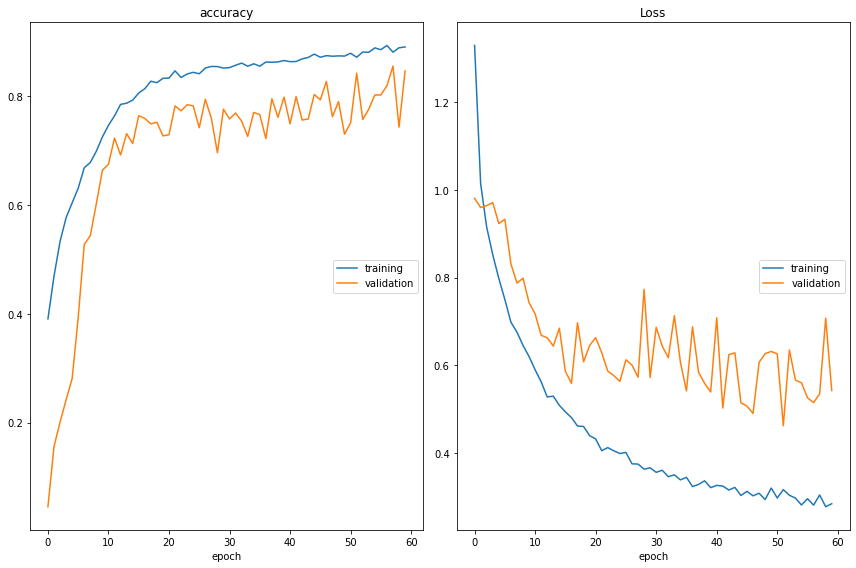

accuracy
	training         	 (min:    0.391, max:    0.893, cur:    0.891)
	validation       	 (min:    0.045, max:    0.856, cur:    0.847)
Loss
	training         	 (min:    0.277, max:    1.330, cur:    0.284)
	validation       	 (min:    0.462, max:    0.981, cur:    0.542)
281/281 [==============================] - 2s 7ms/step - loss: 0.2836 - accuracy: 0.8907 - val_loss: 0.5421 - val_accuracy: 0.8465


In [ ]:
epochs=60
history = model_nn_lda_TM.fit(
                        x = X_train_sm_lda,
                        y = y_train_sm_one_hot,
                        validation_data=(X_test_hidden_lda, y_test_hidden_one_hot),
                        epochs=epochs,
                        batch_size=40,
                        callbacks=[PlotLossesKerasTF()]
                      )

#####Prediction

In [ ]:
#predict sentiment with LDA decomposition
predict_nn_lda_TM = model_nn_lda_TM.predict(X_test_hidden_lda)
predict_nn_lda_TM = class_samples_[[np.argmax(i) for i in predict_nn_lda_TM]]

#delete model
del model_nn_lda_TM

In [ ]:
#Evaluation Metrics for LDA decomposition
print(metrics.classification_report(pd_s_target_test_hidden, predict_nn_lda_TM))

              precision    recall  f1-score   support

    Negative       0.12      0.29      0.17        24
     Neutral       0.10      0.15      0.12        39
    Positive       0.95      0.89      0.92       934

    accuracy                           0.85       997
   macro avg       0.39      0.45      0.40       997
weighted avg       0.89      0.85      0.87       997



####Non-Negative Matrix Factorization

In [ ]:
from sklearn.decomposition import NMF

#####NMF Transform

In [ ]:
model_nmf = NMF(n_components=n_components, init='random', random_state=0)
model_nmf.fit(all_data_tfidf)

NMF(init='random', n_components=100, random_state=0)

In [ ]:
# get topics for train data
X_train_nmf = model_nmf.transform(train_tfidf)
# get topics for test hidden
X_test_hidden_nmf = model_nmf.transform(test_hidden_tfidf)

#Oversampling is used to tackle the class imbalance problem.
smote = SMOTE(random_state=42)
X_train_sm_nmf, y_train_sm = smote.fit_resample(X_train_nmf, pd_s_target_train)
del smote

In [ ]:
class_samples_ = pd_s_target_train.unique()
y_train_sm_one_hot = label_binarize(y_train_sm, classes=class_samples_)
y_test_hidden_one_hot = label_binarize(pd_s_target_test_hidden, classes=class_samples_)

#####Build nn model

In [ ]:
model_nn_nmf_TM = Model(input_nn_TM, out_nn_TM)

In [ ]:
model_nn_nmf_TM.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

#####Train model

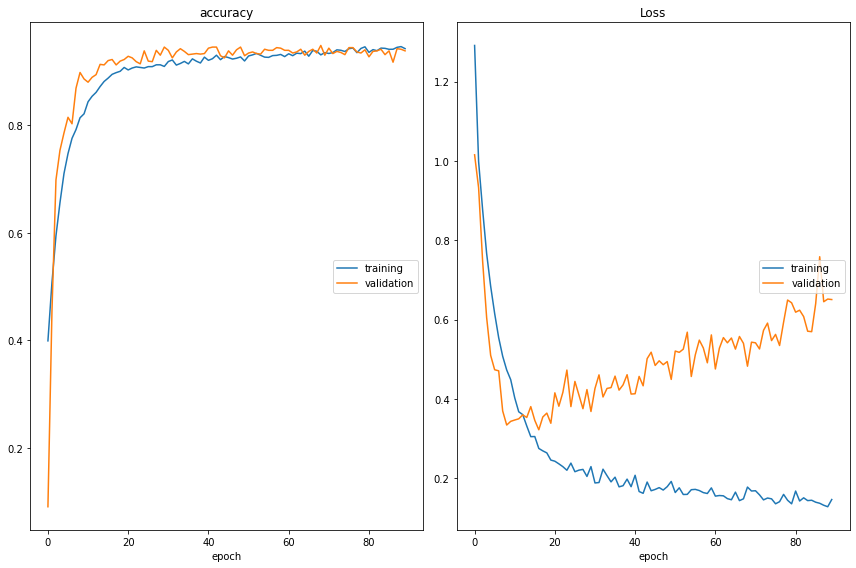

accuracy
	training         	 (min:    0.399, max:    0.946, cur:    0.942)
	validation       	 (min:    0.091, max:    0.948, cur:    0.938)
Loss
	training         	 (min:    0.128, max:    1.291, cur:    0.146)
	validation       	 (min:    0.322, max:    1.016, cur:    0.651)
281/281 [==============================] - 2s 6ms/step - loss: 0.1463 - accuracy: 0.9420 - val_loss: 0.6506 - val_accuracy: 0.9378


In [ ]:
epochs=90
history = model_nn_nmf_TM.fit(
                        x = X_train_sm_nmf,
                        y = y_train_sm_one_hot,
                        validation_data=(X_test_hidden_nmf, y_test_hidden_one_hot),
                        epochs=epochs,
                        batch_size=40,
                        callbacks=[PlotLossesKerasTF()]
                      )

#####Predict

In [ ]:
#predict sentiment with NMF decomposition
predict_nn_nmf_TM = model_nn_nmf_TM.predict(X_test_hidden_nmf)
predict_nn_nmf_TM = class_samples_[[np.argmax(i) for i in predict_nn_nmf_TM]]

#delete model
#del model_nn_nmf_TM

32/32 [==============================] - 0s 2ms/step


In [ ]:
#Evaluation Metrics for NMF decomposition
print(metrics.classification_report(pd_s_target_test_hidden, predict_nn_nmf_TM))

              precision    recall  f1-score   support

    Negative       0.42      0.42      0.42        24
     Neutral       0.48      0.41      0.44        39
    Positive       0.97      0.97      0.97       934

    accuracy                           0.94       997
   macro avg       0.62      0.60      0.61       997
weighted avg       0.93      0.94      0.94       997



#Conclusion

Working on this project:

- Perform an EDA on the dataset
- Convert the reviews in Tf-Idf score
- Text procesing (drop stopwords, drop punctuation and lemmatization)
- Implement several ML algorithms(Naive Bayes, Random Forest, Xgboost and SVM’s)
- Tackle the class of imbalance problem with SMOTE
- Use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve
- Use fine-tuning parameter for ML algoritm like RandomizedSearchCV
- Use ensemble techniques like: XGboost + NB + RF + SVM.
- Use LSTM, GRU and NN deep learning model
- Use fine-tuning parameter for DL models like RandomizedSearchCV
- Provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF)


I have come to the conclusion that some ML algorithms offer much better results to predict unbalanced data, but if we use some decomposition algorithms like LDA and NMF, for NN learning algorithms we can obtain results comparable to ML models. We can use fine-tuning parameter to find best parameter for best prediction.